In [2]:
import numpy as np
from skimage import data, color, io, transform, filters, exposure
from skimage import feature
import matplotlib.pyplot as plt
import os

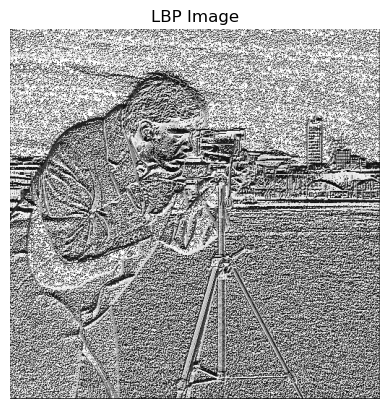

In [9]:
img = data.camera()

n_points = 8
radius = 1
lbp = feature.local_binary_pattern(img, n_points, radius)
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(lbp,'gray')
ax.set_title('LBP Image')
plt.show()

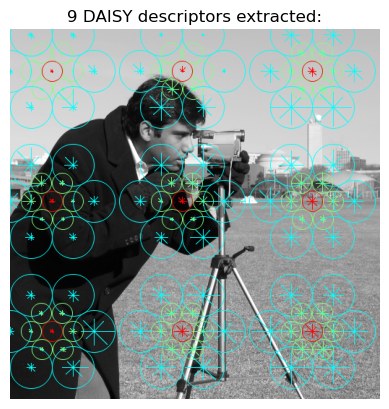

In [6]:
img = data.camera()
descs, descs_img = feature.daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

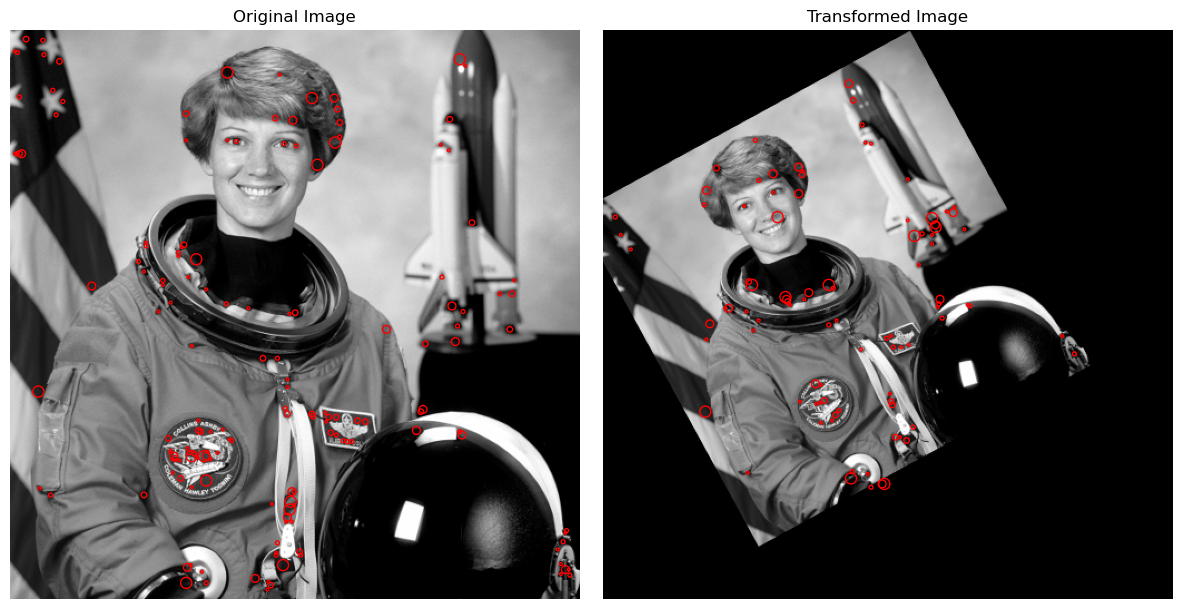

In [7]:
img_orig = color.rgb2gray(data.astronaut())
tform = transform.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                           translation=(150, -200))
img_warp = transform.warp(img_orig, tform)

detector = feature.CENSURE()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

detector.detect(img_orig)

ax[0].imshow(img_orig, cmap=plt.cm.gray)
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].set_title("Original Image")

detector.detect(img_warp)

ax[1].imshow(img_warp, cmap=plt.cm.gray)
ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')
ax[1].set_title('Transformed Image')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()